# ATIVIDADE-01 - REGRESSÃO LINEAR

Criar um Jupyter Notebook usando o Colab ou sua ferramenta local de preferência, onde deve importar o dataset CSV e criar um modelo de Regressão Linear para resolver o problema proposto (Predição de salário a partir dos anos de experiência).

Você deve subir o seu código em seu repositório do GitHub criado para a disciplina em uma pasta chamada "Atividade Aula 1". O nome do arquivo Jupyter Notebook não importa, só se atente para o nome da pasta.

Criado essa pasta e tendo o arquivo no GitHub, deve então submeter nessa atividade o link para a pasta "Atividade Aula 1" em seu repositório.

Exemplo de link com o formato correto: https://github.com/vcasadei/RNA-e-Deep-Learning---CESAR-School-2025.01/tree/main/Atividade%20Aula%201

In [ ]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib   # para salvar o modelo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho do arquivo no Drive
caminho_csv = '/content/drive/MyDrive/Salary_dataset.csv'

# Leitura do CSV
df = pd.read_csv(caminho_csv, encoding='utf-8', sep=',')

# Exibir as primeiras linhas
display(df.head())

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [ ]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [ ]:
df.nunique()

,0
Unnamed: 0,30
YearsExperience,28
Salary,30


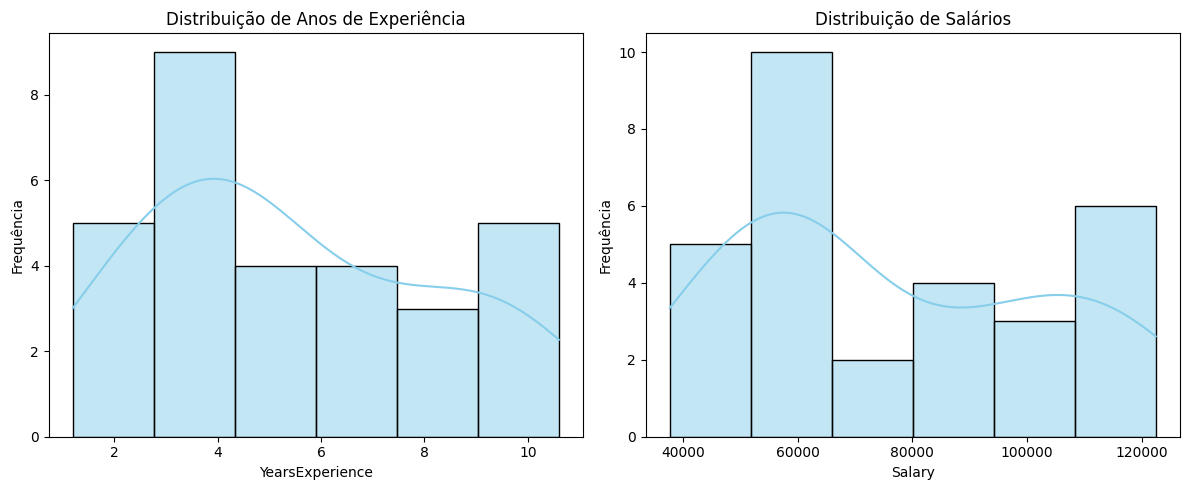

In [ ]:
# Criar a figura com 1 linha e 2 colunas de gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- Gráfico 1: YearsExperience ---
sns.histplot(df['YearsExperience'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribuição de Anos de Experiência')
axs[0].set_xlabel('YearsExperience')
axs[0].set_ylabel('Frequência')

# --- Gráfico 2: Salary ---
sns.histplot(df['Salary'], kde=True, ax=axs[1], color='skyblue')
axs[1].set_title('Distribuição de Salários')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('Frequência')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

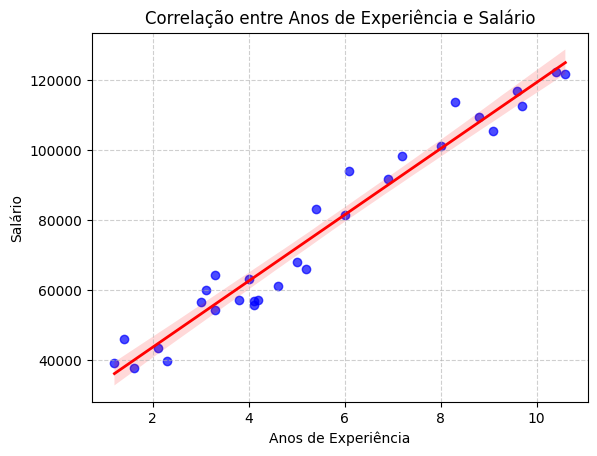

Correlação (Pearson):
0.97824161848876


In [ ]:
# Gráfico de dispersão + linha de regressão
sns.regplot(
    x='YearsExperience',
    y='Salary',
    data=df,
    scatter_kws={'alpha':0.7, 'color':'blue'},  # estilo dos pontos
    line_kws={'color':'red', 'lw':2}            # estilo da linha de regressão
)

# Personalizações
plt.title('Correlação entre Anos de Experiência e Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("Correlação (Pearson):")
print(df[['YearsExperience','Salary']].corr().iloc[0,1])

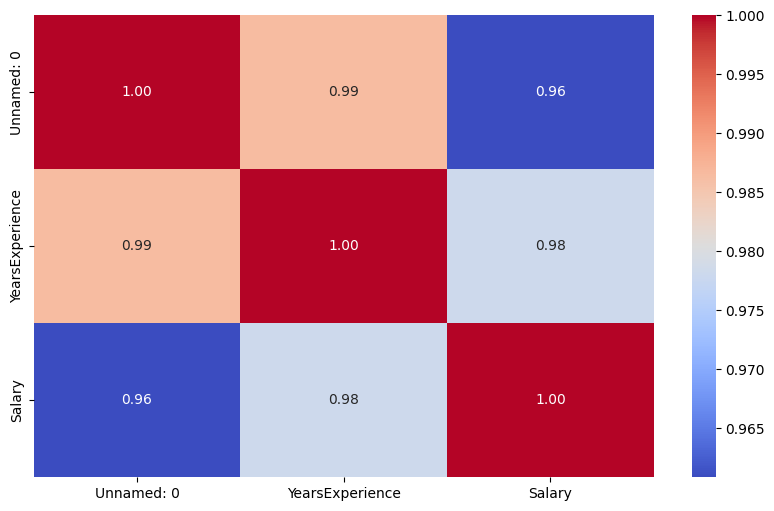

In [ ]:
corr = df.corr(numeric_only=True)        # correlação apenas numéricas
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
# Dividir treino e teste
X = df[['YearsExperience']].values   # formato 2D (n_samples, 1)
y = df['Salary'].values              # formato 1D

In [ ]:
# Holdout 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes: (24, 1) (6, 1) (24,) (6,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# parâmetros aprendidos
print("Coeficiente (slope):", model.coef_[0])
print("Intercepto:", model.intercept_)

Coeficiente (slope): 27151.537425833674
Intercepto: 74208.625


In [ ]:
# previsão de treino e teste
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

In [ ]:
# métricas de desempenho
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_t, mse_t, rmse_t, r2_t = regression_metrics(y_train, y_train_pred)
mae_te, mse_te, rmse_te, r2_te = regression_metrics(y_test, y_test_pred)

print("Dados de TREINO")
print(f"MAE:  {mae_t:.2f}")
print(f"MSE:  {mse_t:.2f}")
print(f"RMSE: {rmse_t:.2f}")
print(f"R²:   {r2_t:.4f}")

print("\nDados de TESTE")
print(f"MAE:  {mae_te:.2f}")
print(f"MSE:  {mse_te:.2f}")
print(f"RMSE: {rmse_te:.2f}")
print(f"R²:   {r2_te:.4f}")

Dados de TREINO
MAE:  4221.05
MSE:  27102249.73
RMSE: 5205.98
R²:   0.9645

Dados de TESTE
MAE:  6286.45
MSE:  49830096.86
RMSE: 7059.04
R²:   0.9024


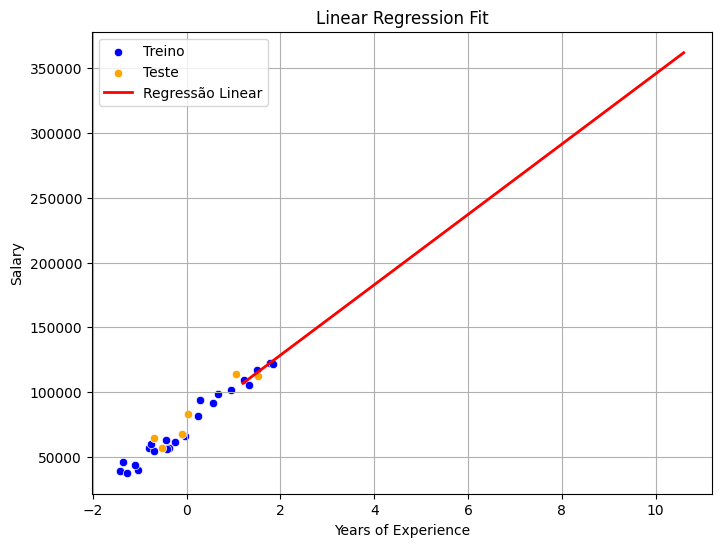

In [ ]:
# plotar reta de regressão sobre os dados (teste + treino)
plt.figure(figsize=(8,6))
# pontos
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Treino', color='blue')
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Teste', color='orange')

# reta de regressão (linha contínua)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color='red', linewidth=2, label='Regressão Linear')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

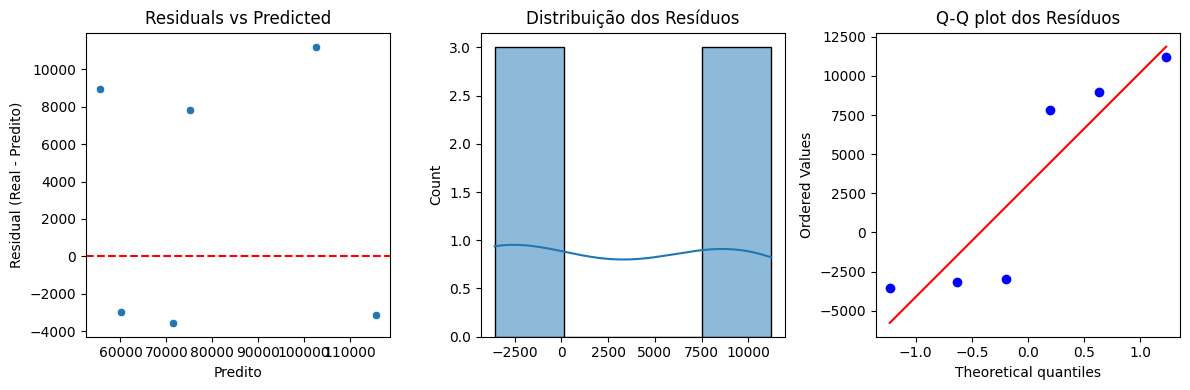

In [ ]:
# análise de resíduos - checagem de suposições
residuals = y_test - y_test_pred

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predito')
plt.ylabel('Residual (Real - Predito)')
plt.title('Residuals vs Predicted')

plt.subplot(1,3,2)
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')

plt.subplot(1,3,3)
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot dos Resíduos')

plt.tight_layout()
plt.show()

In [ ]:
# salvar o modelo treinado
joblib.dump(model, '/content/linear_reg_salary_model.pkl')
print("Modelo salvo em /content/linear_reg_salary_model.pkl")

Modelo salvo em /content/linear_reg_salary_model.pkl


In [ ]:
# carregar e prever
mdl = joblib.load('/content/linear_reg_salary_model.pkl')
example = np.array([[5.5]])  # anos de experiência
pred = mdl.predict(example)
print(f"Estimativa de salário para {example[0,0]} anos de experiência: R$ {pred[0]:.2f}")

Estimativa de salário para 5.5 anos de experiência: R$ 223542.08


In [ ]:
# gerar um diagnóstico estátistico
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary2(float_format="%.2f"))

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.955     
Dependent Variable: y                AIC:                606.8823  
Date:               2025-10-30 01:37 BIC:                609.6847  
No. Observations:   30               Log-Likelihood:     -301.44   
Df Model:           1                F-statistic:        622.5     
Df Residuals:       28               Prob (F-statistic): 1.14e-20  
R-squared:          0.957            Scale:              3.3505e+07
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     24848.2040 2306.6537 10.7724 0.0000 20123.2380 29573.1699
x1         9449.9623  378.7546 24.9501 0.0000  8674.1187 10225.8059
-------------------------------------------------------------------
Omnibus:                2.140        Durbin-Watson:           1.64